In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv('原型设计.csv') 

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

author_counts=df['author'].value_counts()[:10].sort_values(ascending=False) 
author = pd.DataFrame(author_counts)
fig = plt.figure(figsize=(14,7)) 
plt.bar(author.index, author.author,color = '#4584b6',edgecolor = '#4584b6') 

plt.title('top 10 author') 
plt.xlabel('author')
plt.ylabel('counts')
plt.show()

<Figure size 1400x700 with 1 Axes>

Text(0.5,1,'author_thumb')

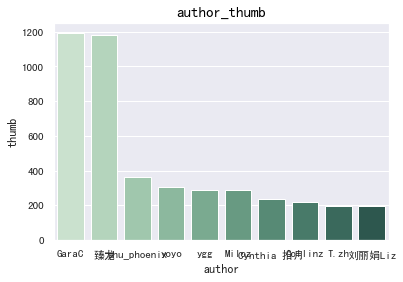

In [3]:
import seaborn as sns
sns.set(font='SimHei') 
pd_df = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False) [:10]
ax = sns.barplot(x='author', y='thumb',data=pd_df,palette=("ch:2.5,-.2,dark=.3")) 
plt.title('author_thumb', color='black', fontsize=15, weight='bold')

Text(0.5,1,'thumb with favorite count')

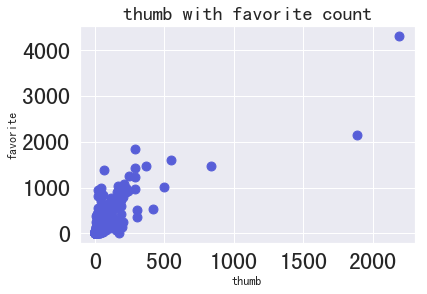

In [4]:
thumb_favorite = df[['thumb','favorite']]
ax4 = thumb_favorite.plot(kind = 'scatter',x='thumb',y='favorite',color = '#575ed8',s=80,fontsize=24)
ax4.set_title("thumb with favorite count",fontsize=20)

In [5]:
import plotly
import plotly.graph_objs as go
df2 = df.groupby(['author'])['favorite'].mean().reset_index().sort_values("favorite",ascending=False)
df2_1 =df2[:10]
data = [go.Bar(x=df2.author, y=df2_1.favorite)]
plotly.offline.plot(data, filename='author_with_favorite_bar-原型设计')

/Users/huashanzeng/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:621: UserWarning:

Your filename `author_with_favorite_bar-原型设计` didn't end with .html. Adding .html to the end of your file.



'file:///Users/huashanzeng/Untitled Folder/author_with_favorite_bar-原型设计.html'

In [6]:
import pyecharts
from pyecharts import Bar

df3 = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False)
df3_1 = df3[:10]
attr = df3_1.author
v2 = df3_1.thumb
bar = Bar("authors by thumb")
bar.add("thumb", attr, v2, mark_line=["average"])
attr = df2_1.author
v2 = df2_1.favorite
bar_1 = Bar("authors by favorite")
bar_1.add("by favorite", attr, v2, mark_line=["average"])

bar

In [7]:
bar_1

In [8]:
df["author"].describe()

count     721
unique    293
top        浪子
freq       46
Name: author, dtype: object

In [9]:
df[df["thumb"]>50].describe()

,Unnamed: 0,favorite,thumb
count,117.000000,117.000000,117.000000
mean,464.068376,536.871795,166.820513
std,177.318374,537.091891,272.619465
min,21.000000,18.000000,52.000000
25%,302.000000,219.000000,67.000000
50%,521.000000,367.000000,93.000000
75%,624.000000,668.000000,173.000000
max,703.000000,4317.000000,2193.000000


In [10]:
df[df["favorite"]>50].describe()

,Unnamed: 0,favorite,thumb
count,452.000000,452.000000,452.000000
mean,416.055310,242.918142,58.783186
std,166.465817,341.149855,152.453568
min,21.000000,51.000000,3.000000
25%,278.750000,77.000000,15.000000
50%,425.500000,124.000000,25.500000
75%,558.250000,253.750000,52.000000
max,717.000000,4317.000000,2193.000000


In [2]:
df[(df["thumb"]>50)&(df["favorite"]>50)].describe()

,Unnamed: 0,favorite,thumb
count,115.000000,115.000000,115.000000
mean,460.156522,545.713043,167.765217
std,176.323795,537.506912,274.799172
min,21.000000,73.000000,52.000000
25%,300.000000,228.000000,67.500000
50%,520.000000,374.000000,93.000000
75%,621.000000,695.000000,173.500000
max,703.000000,4317.000000,2193.000000
